In [161]:
import numpy as np


N = 150  # 時刻の数 ; t_-1 : t_100
dt = 0.1  # sampling scale[s]
t = np.arange(0 - dt, dt * (N - 1), dt)  # tiem ; t_-1 ~ t_105, index ; 0 ~ 106


# 設定値軌道
omega1 = 0.4 * np.pi
omega2 = 0.2 * np.pi
a1 = 1
a2 = 0
p1 = np.pi / 10
p2 = np.pi / 5
s = a1 * np.sin(omega * t - p1) + a2 * np.sin(omega2 * t - p2)


# 参照軌道は指数関数
lam = 1


n_Hp = 2  # 予測horizonはステップ何個分か
n_Hu = 1  # 制御horizonはステップ何個分か
Hp = dt * n_Hp  # 予測horizonの実際の長さ[s]
Hu = dt * n_Hu  # 制御horizonの実際の長さ[s]


y = np.empty(100)  # time ; t_1 ~ t_100, index ; 0 ~ 99
u = np.empty(100)  # time ; t_0 ~ t_99, index ; 0 ~ 99

# 初期値を挿入
y_0 = 2  # 時刻t_0の出力
u_before = 1  # 制御開始の1時刻前、時刻t_-1の入力
y = np.insert(y, 0, y_0)  # time ; t_0 ~ t_100, index ; 0 ~ 100
u = np.insert(u, 0, u_before)  # time ; t_-1 ~ 98, index ; 0 ~ 100


# model
def f(y, u):
    return 0.7 * y + 2 * u

In [162]:
for i in range(100):
# i ; 0 ~ 99
# y[1 : 100]を埋める
# u[1 : 100]を埋める

    
    # step reaction
    for j in range(n_Hp):
        if j == 0:
            S_next = f(y[i], 1)
        else:
            S_next = f(S, 0)
        S = S_next
    
    
    epsilon = s[i] - y[i]
    
    
    r = s[i + n_Hp] - lam ** n_Hp * epsilon
    
    
    # free reaction
    for j in range(n_Hp):
        if j == 0:
            fr_next = f(y[i], u[i])
        else:
            fr_next = f(fr, u[i])
        fr = fr_next
    
    
    delta_u = (r - fr) / S
    
    
    u[i + 1] = u[i] + delta_u
    
    
    y[i + 1] = f(y[i], u[i + 1])

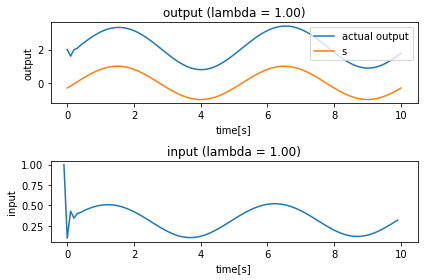

In [163]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(t[1 : 102], y, label = 'actual output')
ax1.set_title('output (lambda = %1.2f)' %lam)
ax1.set_xlabel('time[s]')
ax1.set_ylabel('output')
ax1.set_xlim([-0.5, 10.5])
ax1.plot(t[1 : 102], s[1 : 102], label = 's')
ax1.legend()

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(t[0 : 101], u)
ax2.set_title('input (lambda = %1.2f)' %lam)
ax2.set_xlabel('time[s]')
ax2.set_ylabel('input')
ax2.set_xlim([-0.5, 10.5])

plt.tight_layout()
plt.show()